### Spectral analysis

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import numpy as np

In [2]:
welch_df = pd.read_csv('/Users/labc02/Documents/PDCB_data/MK-project/LFP_data/Periodograms/periodograms_pool.csv')

In [5]:
welch_long = welch_df.melt(id_vars = ['Date', 'Genotype', 'Sex', 'Tx', 'Condition'], var_name = 'Freqs', value_name = 'Power')

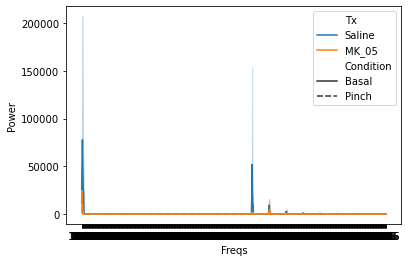

In [10]:
sns.lineplot(data = welch_long[welch_long['Genotype']=='WT'], x = 'Freqs', y = 'Power', hue = 'Tx', style = 'Condition')

In [11]:
welch_long[(welch_long['Genotype'] == 'WT') & (welch_long['Tx'] == 'Saline') & (welch_long['Condition'] == 'Basal')]

,Date,Genotype,Sex,Tx,Condition,Freqs,Power
0,220621,WT,Fem,Saline,Basal,0.5,12399.824110
2,230621,WT,Fem,Saline,Basal,0.5,1830.720273
4,20721,WT,Male,Saline,Basal,0.5,8212.473915
6,30721,WT,Male,Saline,Basal,0.5,79713.526120
28,220621,WT,Fem,Saline,Basal,0.75,12003.461300
...,...,...,...,...,...,...,...
22322,30721,WT,Male,Saline,Basal,199.75,0.044650
22344,220621,WT,Fem,Saline,Basal,200,0.023229
22346,230621,WT,Fem,Saline,Basal,200,0.031439
22348,20721,WT,Male,Saline,Basal,200,0.189191


In [58]:
welch_df['Tx'].unique()

array(['Saline', 'MK_05'], dtype=object)

In [59]:
wt_pl_bl = welch_df[(welch_df['Genotype'] == 'WT') & (welch_df['Tx'] == 'Saline')  & (welch_df['Condition'] == 'Basal')].copy()
wt_pl_pn = welch_df[(welch_df['Genotype'] == 'WT') & (welch_df['Tx'] == 'Saline')  & (welch_df['Condition'] == 'Pinch')].copy()
wt_mk_bl = welch_df[(welch_df['Genotype'] == 'WT') & (welch_df['Tx'] == 'MK_05')  & (welch_df['Condition'] == 'Basal')].copy()
wt_mk_pn = welch_df[(welch_df['Genotype'] == 'WT') & (welch_df['Tx'] == 'MK_05')  & (welch_df['Condition'] == 'Pinch')].copy()
ko_pl_bl = welch_df[(welch_df['Genotype'] == 'KO') & (welch_df['Tx'] == 'Saline')  & (welch_df['Condition'] == 'Basal')].copy()
ko_pl_pn = welch_df[(welch_df['Genotype'] == 'KO') & (welch_df['Tx'] == 'Saline')  & (welch_df['Condition'] == 'Pinch')].copy()
ko_mk_bl = welch_df[(welch_df['Genotype'] == 'KO') & (welch_df['Tx'] == 'MK_05')  & (welch_df['Condition'] == 'Basal')].copy()
ko_mk_pn = welch_df[(welch_df['Genotype'] == 'KO') & (welch_df['Tx'] == 'MK_05')  & (welch_df['Condition'] == 'Pinch')].copy()



In [60]:
wt_pl_bl_psd =  wt_pl_bl.iloc[:, 5:].mean(axis=0)
wt_pl_pn_psd =  wt_pl_pn.iloc[:, 5:].mean(axis=0)
wt_mk_bl_psd =  wt_mk_bl.iloc[:, 5:].mean(axis=0)
wt_mk_pn_psd =  wt_mk_pn.iloc[:, 5:].mean(axis=0)
ko_pl_bl_psd =  ko_pl_bl.iloc[:, 5:].mean(axis=0)
ko_pl_pn_psd =  ko_pl_pn.iloc[:, 5:].mean(axis=0)
ko_mk_bl_psd =  ko_mk_bl.iloc[:, 5:].mean(axis=0)
ko_mk_pn_psd =  ko_mk_pn.iloc[:, 5:].mean(axis=0)

In [61]:
ticks = np.arange(0.5, 200.25, 0.25)

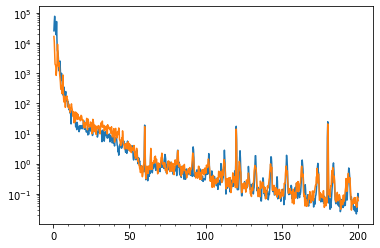

In [65]:
plt.plot(ticks, wt_pl_bl_psd)
plt.plot(ticks, wt_pl_pn_psd)
plt.yscale('log')
#plt.xlim(0, 60)
plt.locator_params(axis = 'x', nbins=6)
plt.minorticks_on()

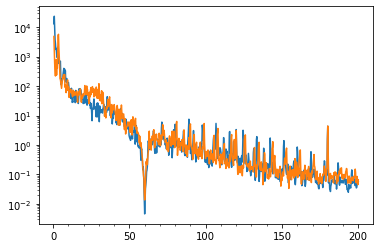

In [64]:
plt.plot(ticks, wt_mk_bl_psd)
plt.plot(ticks, wt_mk_pn_psd)
plt.yscale('log')
#plt.xlim(0, 60)
plt.locator_params(axis = 'x', nbins=6)
plt.minorticks_on()

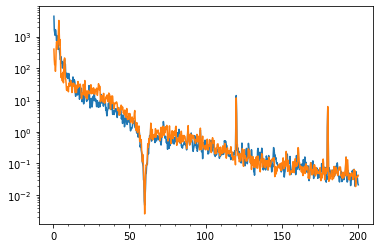

In [66]:
plt.plot(ticks, ko_pl_bl_psd)
plt.plot(ticks, ko_pl_pn_psd)
plt.yscale('log')
#plt.xlim(0, 60)
plt.locator_params(axis = 'x', nbins=6)
plt.minorticks_on()

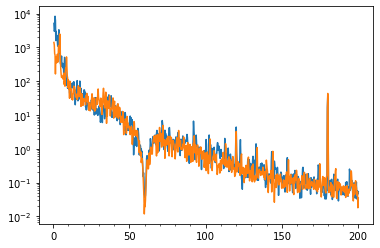

In [67]:
plt.plot(ticks, ko_mk_bl_psd)
plt.plot(ticks, ko_mk_pn_psd)
plt.yscale('log')
#plt.xlim(0, 60)
plt.locator_params(axis = 'x', nbins=6)
plt.minorticks_on()

In [68]:
spectral_df = pd.read_csv('/Users/labc02/Documents/PDCB_data/MK-project/LFP_data/Spectral_analysis/spec_pool.csv')

In [76]:
spectral_df['Group'] = spectral_df['Genotype']+ '_' + spectral_df['Tx']

In [71]:
spectral_df

,Date,Genotype,Sex,Tx,Condition,total_pw,delta_abs,theta_abs,beta_abs,gamma_slow_abs,gamma_fast_abs,delta_rel,theta_rel,beta_rel,gamma_slow_rel,gamma_fast_rel,Group
0,220621,WT,Fem,Saline,Basal,14348.918,12452.775,1421.041,172.462,93.230,75.792,0.868,0.099,0.012,0.006,0.005,WTSalineBasal
1,220621,WT,Fem,Saline,Pinch,10391.962,6360.205,3157.446,331.019,262.069,87.783,0.612,0.304,0.032,0.025,0.008,WTSalinePinch
2,230621,WT,Fem,Saline,Basal,4702.684,3529.282,863.337,121.215,96.237,33.083,0.750,0.184,0.026,0.020,0.007,WTSalineBasal
3,230621,WT,Fem,Saline,Pinch,2098.275,1059.622,617.188,173.914,130.760,46.858,0.505,0.294,0.083,0.062,0.022,WTSalinePinch
4,20721,WT,Male,Saline,Basal,32268.884,28786.537,2693.304,339.947,216.990,54.947,0.892,0.083,0.011,0.007,0.002,WTSalineBasal
5,20721,WT,Male,Saline,Pinch,15132.012,12602.319,1739.532,394.243,200.062,36.861,0.833,0.115,0.026,0.013,0.002,WTSalinePinch
6,150521,KO,Male,Saline,Basal,2489.551,1835.656,354.969,120.272,85.870,40.011,0.737,0.143,0.048,0.034,0.016,KOSalineBasal
7,150521,KO,Male,Saline,Pinch,2814.789,621.554,1560.700,252.452,232.534,63.042,0.221,0.554,0.090,0.083,0.022,KOSalinePinch
8,30721,WT,Male,Saline,Basal,311470.906,303562.681,7266.216,231.845,109.619,48.361,0.975,0.023,0.001,0.000,0.000,WTSalineBasal
9,30721,WT,Male,Saline,Pinch,44504.311,40312.455,3080.064,524.058,266.193,55.420,0.906,0.069,0.012,0.006,0.001,WTSalinePinch


#### Total Power

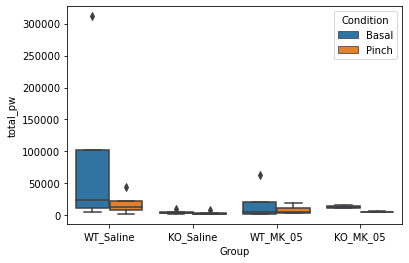

In [77]:
sns.boxplot(data = spectral_df, x = 'Group', y = 'total_pw', hue = 'Condition')

#### Delta relative

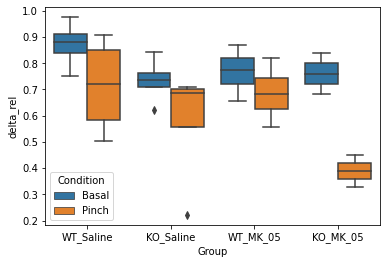

In [78]:
sns.boxplot(data = spectral_df, x = 'Group', y = 'delta_rel', hue = 'Condition')

### Theta relative

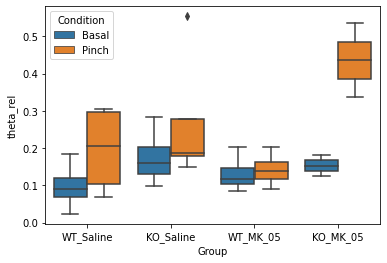

In [79]:
sns.boxplot(data = spectral_df, x = 'Group', y = 'theta_rel', hue = 'Condition')

### Beta relative

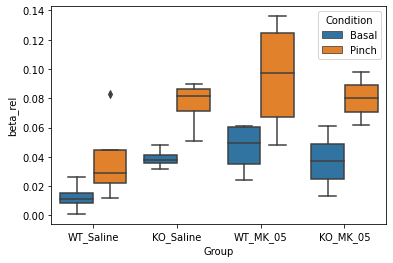

In [80]:
sns.boxplot(data = spectral_df, x = 'Group', y = 'beta_rel', hue = 'Condition')

### Gamma slow rel

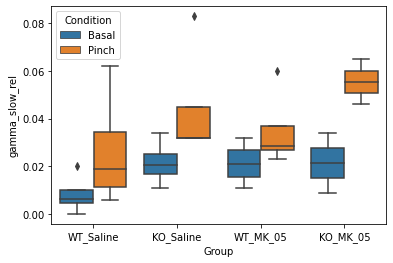

In [81]:
sns.boxplot(data = spectral_df, x = 'Group', y = 'gamma_slow_rel', hue = 'Condition')

### Gamma fast rel

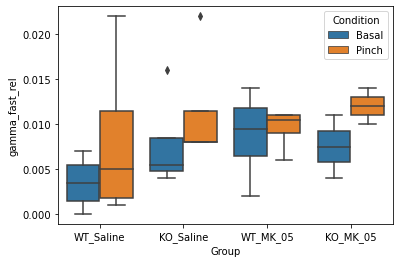

In [82]:
sns.boxplot(data = spectral_df, x = 'Group', y = 'gamma_fast_rel', hue = 'Condition')